# **MÓDULO 19**
# Exercício: Estatística Aplicada

**Efetividade de Duas Estratégias de Ensino**

Imagine que uma escola esteja avaliando a eficácia de duas estratégias de ensino de matemática para alunos do ensino médio. Eles querem determinar se há uma diferença significativa no desempenho médio dos alunos entre as duas estratégias.

# **Hipóteses:**

* Hipótese nula (H0): A média das notas dos alunos na estratégia A é igual à média das notas dos alunos na estratégia B.
* Hipótese alternativa (H1): A média das notas na Estratégia B é maior do que a média das notas na Estratégia A.

# **Dados:**

* Amostra da Estratégia A: Notas de 50 alunos que receberam a Estratégia A.
* Amostra da Estratégia B: Notas de 50 alunos que receberam a Estratégia B.

Usaremos um teste Z para comparar as médias das notas entre as duas amostras.

Se o p-valor do teste Z for menor que um nível de significância pré-determinado (por exemplo, α = 0.05), rejeitamos a hipótese nula e concluímos que há uma diferença significativa nas médias das notas entre as duas estratégias de ensino.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

Os dados são criados a seguir:

In [2]:
# Definindo médias e desvios padrão para as notas nas duas estratégias
media_estrategia_A = 70
desvio_padrao_estrategia_A = 10

media_estrategia_B = 75
desvio_padrao_estrategia_B = 12

# Gerando as amostras de notas para cada estratégia de ensino da nossa base
np.random.seed(0)  # Para garantir a reprodutibilidade dos resultados
amostra_estrategia_A = np.random.normal(loc=media_estrategia_A, scale=desvio_padrao_estrategia_A, size=50) #50 valores diferentes gerados
amostra_estrategia_B = np.random.normal(loc=media_estrategia_B, scale=desvio_padrao_estrategia_B, size=50) ##50 valores diferentes gerados

print("Notas da Estratégia A:", amostra_estrategia_A[:5]) #mostrando até o 5° resultado
print("Notas da Estratégia B:", amostra_estrategia_B[:5])

Notas da Estratégia A: [87.64052346 74.00157208 79.78737984 92.40893199 88.6755799 ]
Notas da Estratégia B: [64.25440127 79.64282997 68.87033835 60.83241379 74.66181326]


# 1) De acordo com as informações analisadas o nosso teste é unilateral á direita, esquerda ou bicaudal? Justifique.

H1 diz que B > A, logo se trata de um teste unilateral à direita. Pois está verificando desigualdade para '>'.

# 2) Calcule as médias para as duas amostragens e as variâncias. Quais insights você pode retirar comparando os dados?

In [25]:
# Calculando média e desvio padrão das amostras
media_nova = np.mean(amostra_nova)  #usando a biblioteca np
desvio_padrao_nova = np.std(amostra_nova, ddof=1)
media_antiga = np.mean(amostra_antiga)
desvio_padrao_antiga = np.std(amostra_antiga, ddof=1)

print('Média amostra nova:', media_nova)
print('Desvio Padrão amostra nova:', desvio_padrao_nova)
print('Média amostra antiga:', media_antiga)
print('Desvio Padrão amostra antiga:', desvio_padrao_antiga)

Média amostra nova: 74.74868110507046
Desvio Padrão amostra nova: 10.510471952071587
Média amostra antiga: 71.40559272313098
Desvio Padrão amostra antiga: 11.369498421503136


Pelo observado a média da estratégia nova (B) é maior que a da antiga (A), o que pode ser indicativo de melhoria na estratégia nova. Se observa que a variância amostral é menor para a amostra nova o que pode indicar maior homogeneidade, e concentração de dados ao redor da média. 

# 3) Imprima os resultados da estatística do teste Z, p value e indique se rejeitaremos ou não a hipótese nula. Justifique sua resposta.

In [35]:
#Teste de hipótese
t_statistic, p_value = stats.ttest_ind(amostra_nova, amostra_antiga) #teste t
print('Estatística de teste (t_statistic):', t_statistic)
print('Valor de p:', p_value)

Estatística de teste (t_statistic): 1.5267455833477102
Valor de p: 0.130045389609515


In [15]:
# Comparando o p-valor com um nível de significância comum (0.05) criando uma regra para trazer a resposta ideal.
nivel_significancia = 0.05
if p_value < nivel_significancia:
    print("Rejeitamos a hipótese nula: a nova página de destino tem uma taxa de conversão significativamente maior.")
else:
    print("Não temos evidências suficientes para rejeitar a hipótese nula: a nova página de destino não tem uma taxa de conversão significativamente maior.")

Não temos evidências suficientes para rejeitar a hipótese nula: a nova página de destino não tem uma taxa de conversão significativamente maior.


O teste utilizado foi o teste t de Student, pois estamos lidando com duas amostras independentes e não conhecemos o desvio padrão populacional (apenas o desvio amostral), portanto o teste Z não é adequado. O valor de p foi de '0.13', sendo ele maior que a significância, logo não temos evidências suficientes para rejeitar H0. Apesar da média da estratégia B ser maior que a da estratégia A, o p-valor é de 0.13004, indicando que essa diferença pode ser atribuída ao acaso ao nível de 5% de significância. Portanto, não há evidência estatística suficiente para concluir que a estratégia B é superior negando assim a hipótese nula (H0).

# 4) Para finalizar monte o gráfico da distribuição da estatística do nosso teste Z e explique o que pode ser observado através dele.

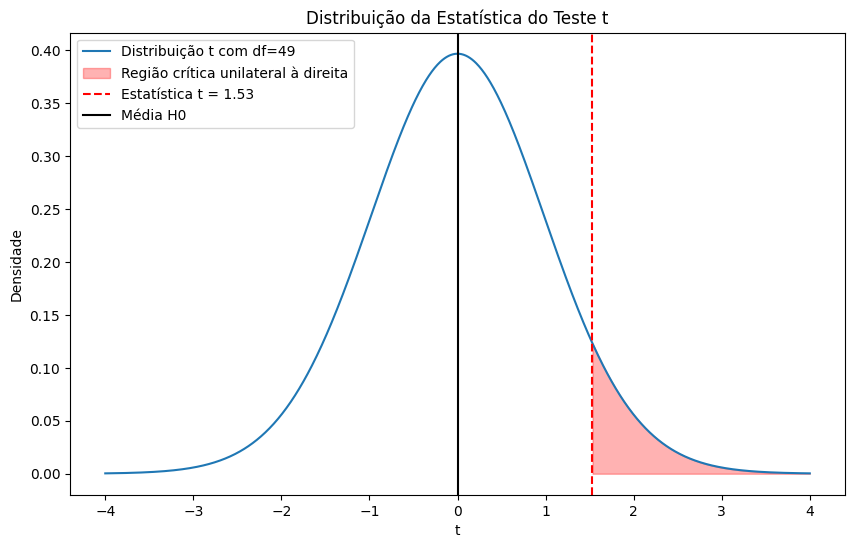

In [34]:
from scipy.stats import t

# Estatística t calculada anteriormente
# Exemplo: usando Welch t
t_stat, p_val = stats.ttest_ind(amostra_nova, amostra_antiga, equal_var=False)
df = min(len(amostra_nova)-1, len(amostra_antiga)-1)  # graus de liberdade aproximado

# Criando a curva da distribuição t
x = np.linspace(-4, 4, 1000)
y = t.pdf(x, df=df)

plt.figure(figsize=(10,6))
plt.plot(x, y, label=f'Distribuição t com df={df}')
plt.fill_between(x, 0, y, where=(x>=t_stat), color='red', alpha=0.3, label='Região crítica unilateral à direita')
plt.axvline(t_stat, color='red', linestyle='--', label=f'Estatística t = {t_stat:.2f}')
plt.axvline(0, color='black', linestyle='-', label='Média H0')
plt.title('Distribuição da Estatística do Teste t')
plt.xlabel('t')
plt.ylabel('Densidade')
plt.legend()
plt.show()

O gráfico mostra a distribuição da estatística t sob a hipótese nula. A linha vermelha indica o valor calculado da estatística a partir das amostras. Como ela não entra na região crítica, o p-valor é maior que 0,05 e, portanto, não rejeitamos a hipótese nula. Isso indica que não há evidência estatística suficiente para afirmar que a estratégia B é superior à estratégia A.